
            2022-SPR-OC-KED-6CC555 
            Data Mining and Foundations of AI
            Student number: **100507179**
            Datasets chosen: ConfirmedCasesByDateReported,
                            PatientNewAdmissions,
                            Deaths.csv

            Made on google colab and runs all on google colab produces same effect with no erorrs my datasets are located on 
            public github account.




Firstly we import our data set and check for nulls and duplicated values, we start with confirmedCasesByDateReported file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
import numpy as np





url = 'https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/ConfirmedCasesByDateReported.csv'
df = pd.read_csv(url)

df.isnull().sum()
df.duplicated().sum()

0

We create histogram to check how distribution looks like 

<Axes: xlabel='newCasesByPublishDate', ylabel='Count'>

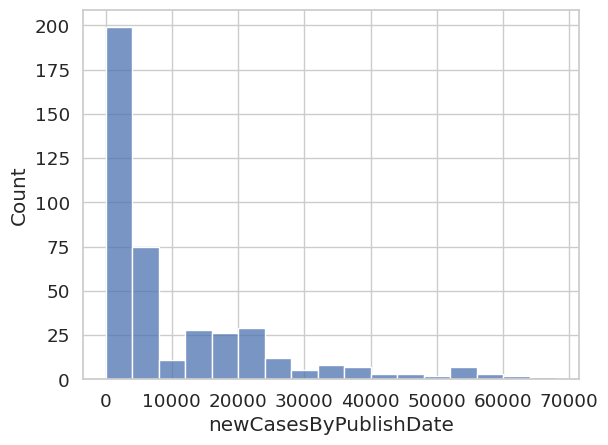

In [69]:

url = 'https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/ConfirmedCasesByDateReported.csv'
df = pd.read_csv(url)
uk_cases = df[df['areaName'] == 'United Kingdom']
sns.histplot(uk_cases['newCasesByPublishDate'])


From this barchart we can understand that distribution was not even and it varies a lot, it can be due to several reasons in this case I asume its how volatile and unpredicatable covid was, especially in the beginning

Original time series implementation below:

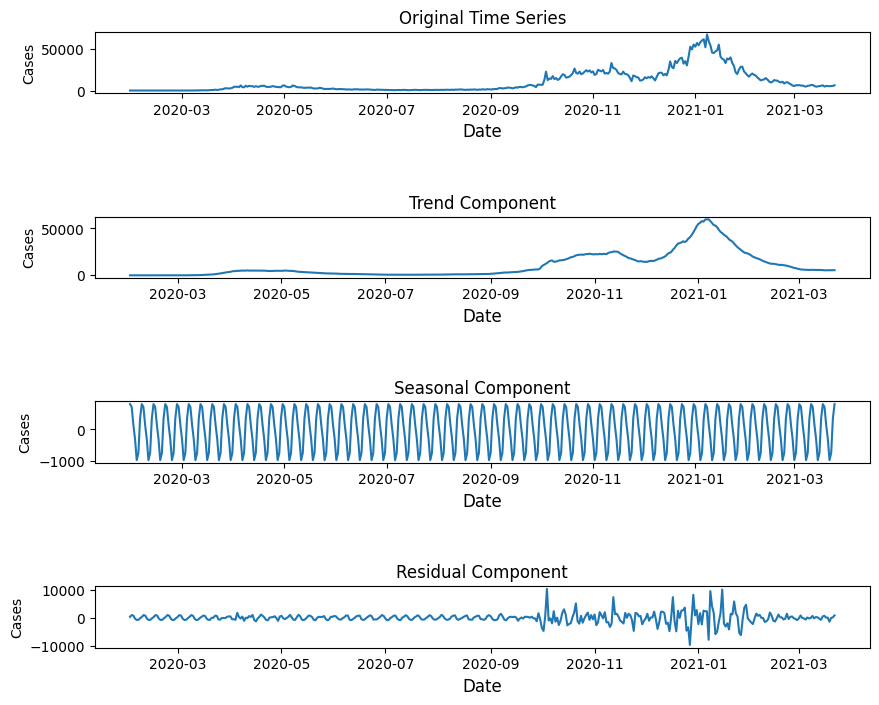

In [3]:

uk_cases = df[df['areaName'] == 'United Kingdom'][['date', 'newCasesByPublishDate']]
uk_cases['date'] = pd.to_datetime(uk_cases['date'], format='%d/%m/%Y')
uk_cases = uk_cases.set_index('date')

decomposition = sm.tsa.seasonal_decompose(uk_cases, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(4, 1, figsize=(10, 8), gridspec_kw={'hspace': 2})
ax[0].set_xlabel('Date', fontsize=12)
ax[0].plot(uk_cases)
ax[0].set(title='Original Time Series', ylabel='Cases')
ax[1].set_xlabel('Date', fontsize=12)
ax[1].plot(trend)
ax[1].set(title='Trend Component', ylabel='Cases')
ax[2].set_xlabel('Date', fontsize=12)
ax[2].plot(seasonal)
ax[2].set(title='Seasonal Component', ylabel='Cases')
ax[3].set_xlabel('Date', fontsize=12)

ax[3].plot(residual)
ax[3].set(title='Residual Component', ylabel='Cases')
plt.show()


original time series:
 We can see that there's been a general increase in cases over time, with some big spikes and drops along the way.

The trend component:
Its pretty much the same as original time series.

the seasonal component:
finds any patterns that repeat over a specific time frame. It is hard to determine what does it tell us, in my opinion it tells us that towards end of the weeks it was going up and towards start down

The residual component:
 Captures elements  that doesn't fit into the trend or seasonal patterns
 Looking at it, we can see that there are some random ups and downs in the number of COVID-19 cases.

Individual analysys per plot:

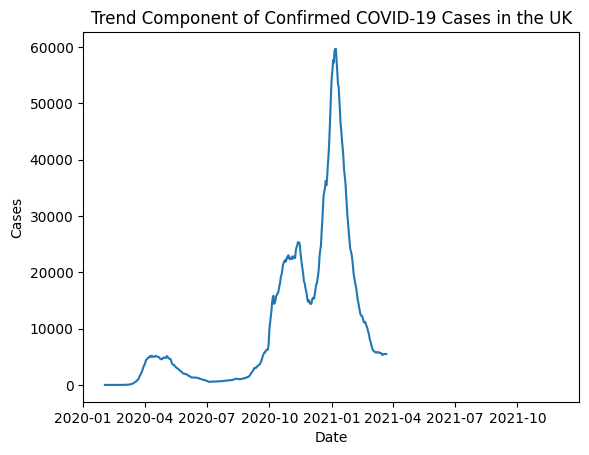

In [4]:
plt.plot(trend)
plt.title('Trend Component of Confirmed COVID-19 Cases in the UK')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'))
plt.show()


So, when we look at the trend component plot of COVID-19 cases in the UK, it seems like things were getting worse from September 2020 to January 2021. But then, starting in February 2021.


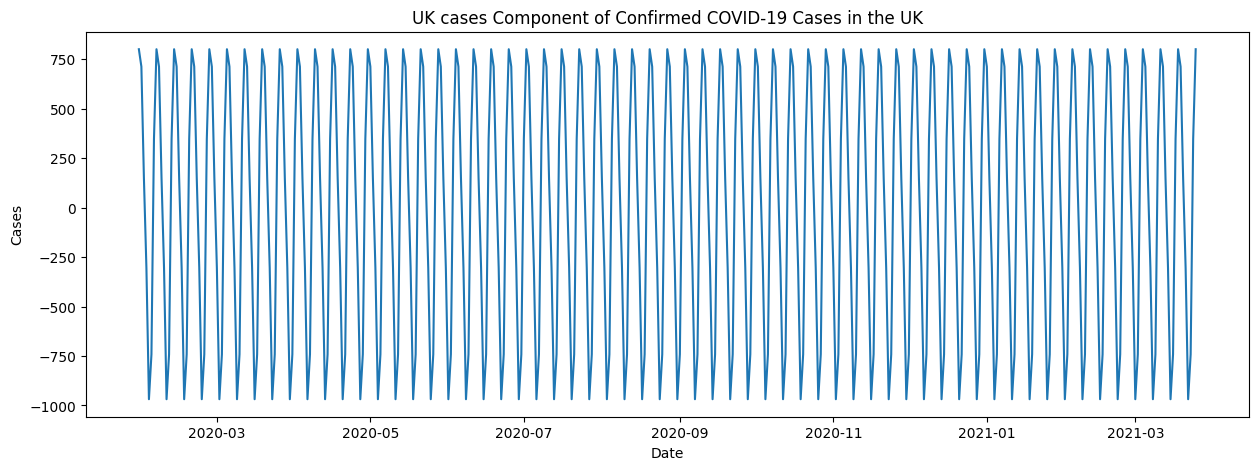

In [5]:
plt.figure(figsize=(15,5))

plt.plot(seasonal)
plt.title('UK cases Component of Confirmed COVID-19 Cases in the UK')
plt.xlabel('Date')
plt.ylabel('Cases')

plt.show()

Down and up pattern, seems like when we approach end of the weeks, cases are increasing, and when approaching beginning of the week, it falls down

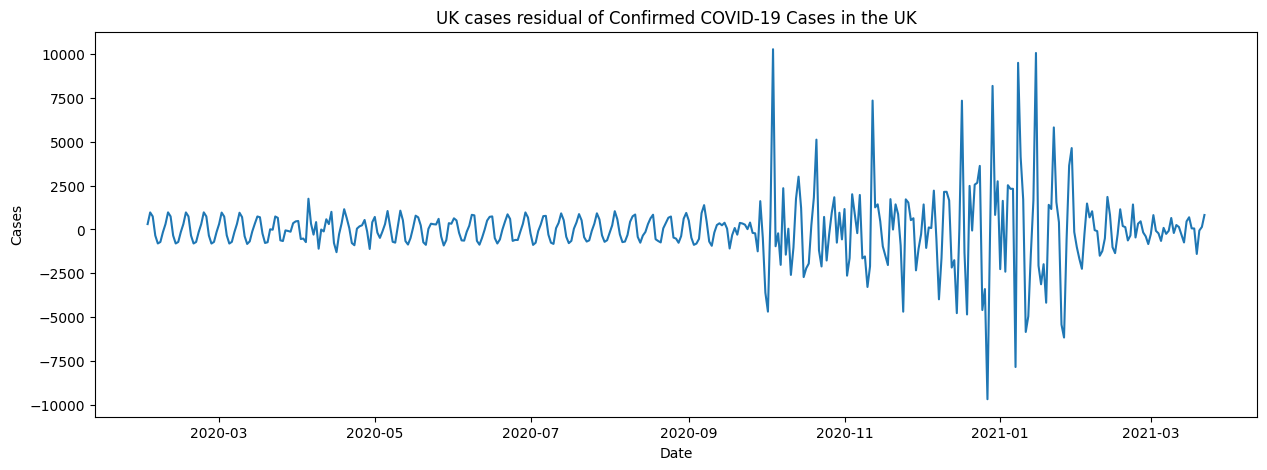

In [6]:
plt.figure(figsize=(15,5))

plt.plot(residual)
plt.title('UK cases residual of Confirmed COVID-19 Cases in the UK')
plt.xlabel('Date')
plt.ylabel('Cases')

plt.show()

According to the documentation if the residual component shows a pattern or structure, it suggests that there might be something missing in the model or something else that is affecting the data. On the other hand, if the residual component appears to be random and fluctuates around zero, it suggests that the model is accurate and can be used for forecasting.

In our case its slightly hard to predict whether the model is good or not, as in the beginning its good but then it suddendly flucutales a lot and goign back to normal. 


We create correlation matrix to see whether there's correlation between variables in the set

In [7]:
url = 'https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/ConfirmedCasesByDateReported.csv'
df = pd.read_csv(url)
corr = df.corr()
print(corr)

                       newCasesByPublishDate
newCasesByPublishDate                    1.0


<ipython-input-7-a0b78e51aa39>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Only one variable so correlation is meaningless here 

Lets take a look on the next set PatientNewAdmissions, lets start with decompositon

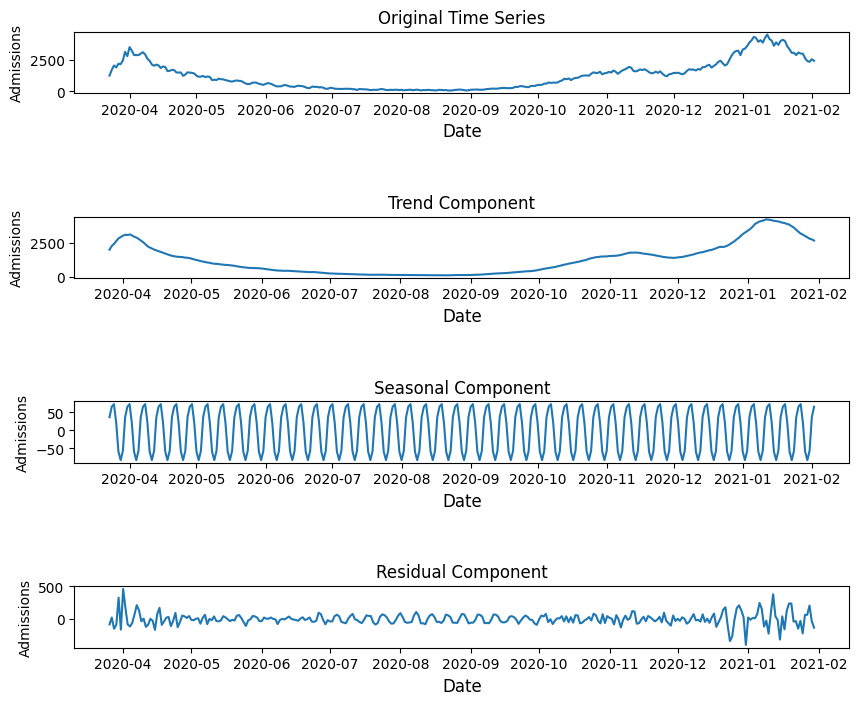

In [8]:
url = 'https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/PatientNewAdmissions.csv'
df = pd.read_csv(url)
df = df[['date', 'areaName', 'newAdmissions']] 
df = df[df['areaName'] == 'United Kingdom'] 
df = df.drop('areaName', axis=1)  
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')  # Convert date to datetime format
df = df.set_index('date')

decomposition = sm.tsa.seasonal_decompose(df, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(4, 1, figsize=(10, 8), gridspec_kw={'hspace': 2})
ax[0].set_xlabel('Date', fontsize=12)
ax[0].plot(df)
ax[0].set(title='Original Time Series', ylabel='Admissions')
ax[1].set_xlabel('Date', fontsize=12)
ax[1].plot(trend)
ax[1].set(title='Trend Component', ylabel='Admissions')
ax[2].set_xlabel('Date', fontsize=12)
ax[2].plot(seasonal)
ax[2].set(title='Seasonal Component', ylabel='Admissions')
ax[3].set_xlabel('Date', fontsize=12)

ax[3].plot(residual)
ax[3].set(title='Residual Component', ylabel='Admissions')
plt.show()


The trend component tells us that the number of new admissions increased in the beginning and then it got quiet but from September 2020 to January 2021 rose again , but has been decreasing since then.

The seasonal component tells us In our case, it shows that the number of new admissions tends to be higher during the winter months and lower during the summer months.

The residual component shows data that cannot be explained by the trend or seasonal patterns. In our case, it shows that there are still some fluctuations in the number of new admissions that cannot be explained by the trend or seasonal patterns, but overall the trend and seasonal components are able to explain most of the variation in the data.




Lets check correlation again

In [9]:
corr = df.corr(numeric_only=True)
print(corr)

               newAdmissions
newAdmissions            1.0


As previosuly, correlation is YET pointless

Now, Lets combine two sets to get new insights, PatientNewAdmissions and COnfirmed Cases

Lets join sets by date and check contents for null or duplicates

In [10]:

admissions_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/PatientNewAdmissions.csv')
cases_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/ConfirmedCasesByDateReported.csv')

combined_df = pd.merge(admissions_df, cases_df, on='date', suffixes=('_admissions', '_cases'))

print(combined_df)


    areaName_admissions       date  newAdmissions  areaName_cases  \
0        United Kingdom   2/2/2021           2460  United Kingdom   
1        United Kingdom   1/2/2021           2590  United Kingdom   
2        United Kingdom  31/1/2021           2379  United Kingdom   
3        United Kingdom  30/1/2021           2447  United Kingdom   
4        United Kingdom  29/1/2021           2664  United Kingdom   
..                  ...        ...            ...             ...   
312      United Kingdom  27/3/2020           2227  United Kingdom   
313      United Kingdom  26/3/2020           1929  United Kingdom   
314      United Kingdom  25/3/2020           2085  United Kingdom   
315      United Kingdom  24/3/2020           1720  United Kingdom   
316      United Kingdom  23/3/2020           1273  United Kingdom   

     newCasesByPublishDate  
0                    16840  
1                    18607  
2                    21088  
3                    23275  
4                    29079

In [11]:
print(admissions_df.columns)
print(cases_df.columns)


Index(['areaName', 'date', 'newAdmissions'], dtype='object')
Index(['areaName', 'date', 'newCasesByPublishDate'], dtype='object')


In [12]:
print(combined_df.isnull().sum())


areaName_admissions      0
date                     0
newAdmissions            0
areaName_cases           0
newCasesByPublishDate    0
dtype: int64


In [13]:
# Check for duplicates
print(combined_df.duplicated().sum())



0


LEts check for correlation now

In [14]:
corr_matrix = combined_df.corr(numeric_only=True)

# Print the correlation matrix
print(corr_matrix)

                       newAdmissions  newCasesByPublishDate
newAdmissions               1.000000               0.794599
newCasesByPublishDate       0.794599               1.000000


still. sadly too little variables to have something that means anything, 

Lets plot newAdmissions to the hospital and new cases on same plot as it might help us understand trends

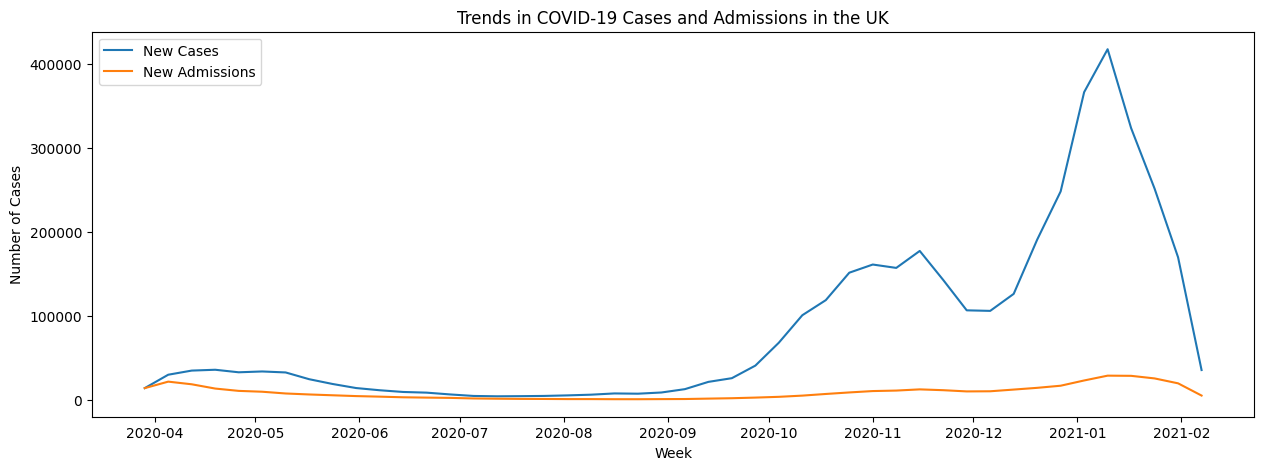

In [15]:
admissions_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/PatientNewAdmissions.csv')
cases_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/ConfirmedCasesByDateReported.csv')

combined_df = pd.merge(admissions_df, cases_df, on='date', suffixes=('_admissions', '_cases'))

combined_df['date'] = pd.to_datetime(combined_df['date'], format='%d/%m/%Y')

weekly_df = combined_df.groupby(pd.Grouper(key='date', freq='W')).sum(numeric_only=True)

plt.figure(figsize=(15, 5))
plt.plot(weekly_df.index, weekly_df['newCasesByPublishDate'], label='New Cases')
plt.plot(weekly_df.index, weekly_df['newAdmissions'], label='New Admissions')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.title('Trends in COVID-19 Cases and Admissions in the UK')
plt.show()


As we can see in the beginnig it seems as admissions and cases were nearly at identical levels, however as time grew we can see massive difference starting to appear:
I have two theories:

*Hospitals got overwhelmed and full and could not admit everyone to the hospital and only severe cases were admitted*

*Initially people of old age and people with existing health problems were getting sick and just unfortunately died, and younger people or without health problems usually did not need hospital help*

Lets make heatmap anyway

<Axes: >

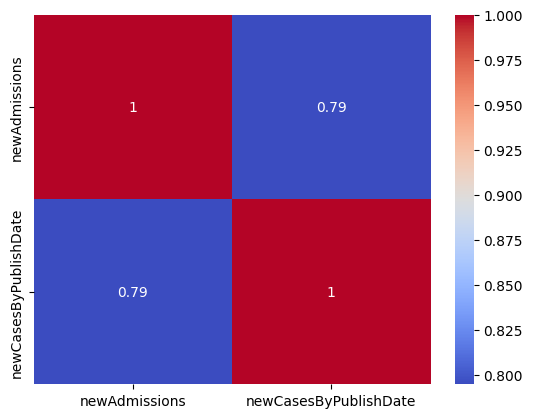

In [16]:

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)


With only two variables heat map is not very helpful or meaningful as for yet


Some types needed adjusting

In [17]:
combined_df['newCasesByPublishDate'] = pd.to_numeric(combined_df['newCasesByPublishDate'], errors='coerce')
combined_df['newAdmissions'] = pd.to_numeric(combined_df['newAdmissions'], errors='coerce')
combined_df = combined_df.dropna() # remove rows with NaN values


Next file to analyse, Deaths, We start firstly as singular file not joined with other set just yet

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

deaths_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/Deaths.csv')

print (deaths_df)


           areaName       date  newDeaths28DaysByDeathDate  \
0    United Kingdom  10/3/2021                          32   
1    United Kingdom   9/3/2021                          97   
2    United Kingdom   8/3/2021                         130   
3    United Kingdom   7/3/2021                         102   
4    United Kingdom   6/3/2021                         128   
..              ...        ...                         ...   
371  United Kingdom   4/3/2020                           0   
372  United Kingdom   3/3/2020                           2   
373  United Kingdom   2/3/2020                           1   
374  United Kingdom   1/3/2020                           0   
375  United Kingdom  29/2/2020                           0   

     cumDeaths28DaysByDeathDate  
0                      125165.0  
1                      125133.0  
2                      125036.0  
3                      124906.0  
4                      124804.0  
..                          ...  
371              

In [19]:
print(deaths_df.isnull().sum())


areaName                      0
date                          0
newDeaths28DaysByDeathDate    0
cumDeaths28DaysByDeathDate    2
dtype: int64


Since we have nan values, lets drop them since there is no good way to predict what values should be. We create new cleaned dataframe

In [20]:
deaths_df_clean= deaths_df.dropna()

In [21]:
print(deaths_df_clean.isnull().sum())


areaName                      0
date                          0
newDeaths28DaysByDeathDate    0
cumDeaths28DaysByDeathDate    0
dtype: int64


In [22]:
print(deaths_df_clean.duplicated().sum())


0


Histogram shows us distribution of deaths

<Axes: xlabel='newDeaths28DaysByDeathDate', ylabel='Count'>

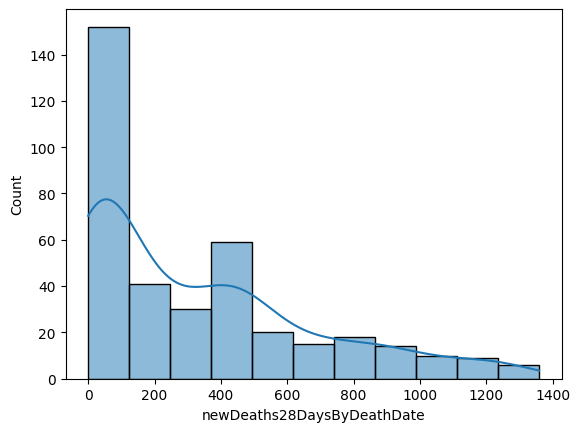

In [23]:
sns.histplot(deaths_df_clean['newDeaths28DaysByDeathDate'], kde=True)


In [24]:
print(deaths_df_clean)

           areaName       date  newDeaths28DaysByDeathDate  \
0    United Kingdom  10/3/2021                          32   
1    United Kingdom   9/3/2021                          97   
2    United Kingdom   8/3/2021                         130   
3    United Kingdom   7/3/2021                         102   
4    United Kingdom   6/3/2021                         128   
..              ...        ...                         ...   
369  United Kingdom   6/3/2020                           0   
370  United Kingdom   5/3/2020                           3   
371  United Kingdom   4/3/2020                           0   
372  United Kingdom   3/3/2020                           2   
373  United Kingdom   2/3/2020                           1   

     cumDeaths28DaysByDeathDate  
0                      125165.0  
1                      125133.0  
2                      125036.0  
3                      124906.0  
4                      124804.0  
..                          ...  
369              

Decomposition of deaths data set

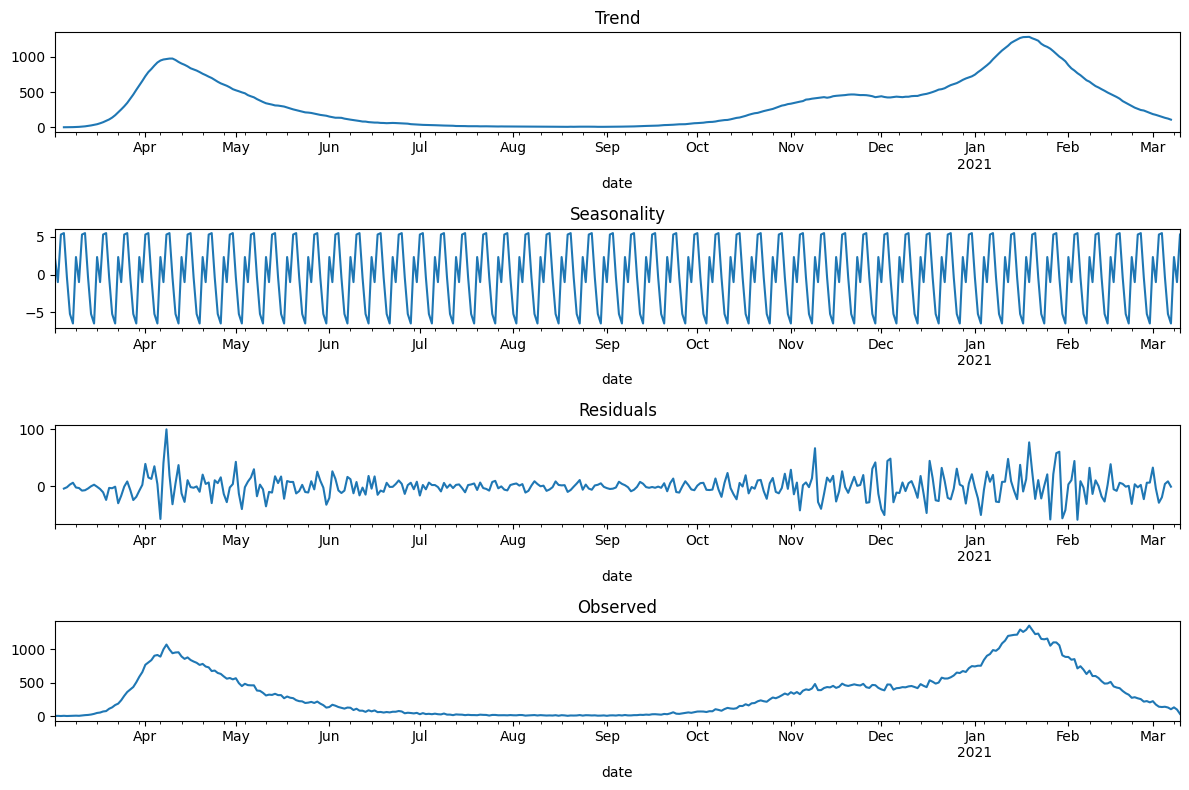

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#had to create copy of df for some reason otherwise I was getting very ugly eroors
deaths_df_clean = deaths_df_clean.copy()

deaths_df_clean['date'] = pd.to_datetime(deaths_df_clean['date'], format='%d/%m/%Y')
deaths_df_clean.set_index('date', inplace=True)

decomposition = seasonal_decompose(deaths_df_clean['newDeaths28DaysByDeathDate'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
decomposition.observed.plot(ax=ax4)
ax4.set_title('Observed')
plt.tight_layout()
plt.show()



The trend component:
we can see that things have been generally going up, then going down and going drastically up again before leveling out in march


the seasonal component:
Similarly to the other decomposition its hard to say in my opinion what it tells us. Again I think its like this: End of the week = more deaths, Begining of the week = less deaths

The residual component show us expected output, fluctuates around 0 with very little to no pattern at all

Obvserved matches trend component  so that means its okay to trust this data

Lets visualise cumulative deaths

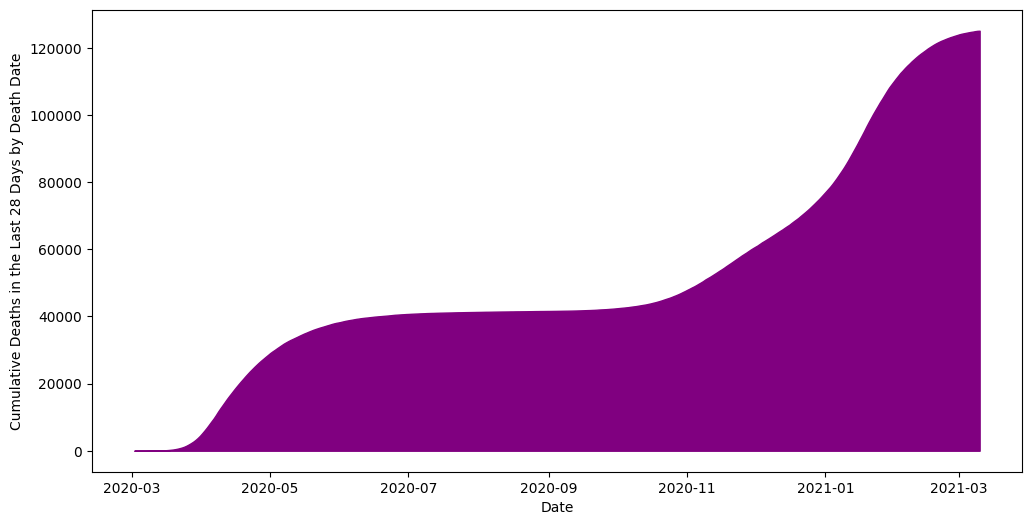

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

deaths_df_clean = deaths_df.copy()
deaths_df_clean['date'] = pd.to_datetime(deaths_df_clean['date'], format='%d/%m/%Y')
deaths_df_clean['cumulative_deaths'] = deaths_df_clean['cumDeaths28DaysByDeathDate']

plt.figure(figsize=(12, 6))

plt.fill_between(deaths_df_clean['date'], deaths_df_clean['cumulative_deaths'], color = 'purple')

plt.xlabel('Date')

plt.ylabel('Cumulative Deaths in the Last 28 Days by Death Date')

plt.show()


As expected, as time grew, cumulative deaths rose too

Lets visualide Cumulative deaths with different kind of plot

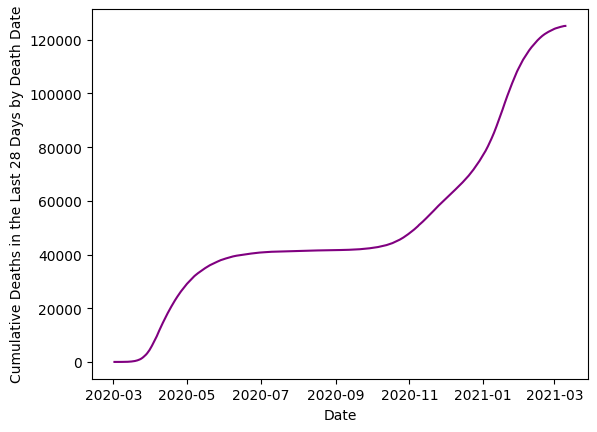

In [27]:
deaths_df_clean = deaths_df.copy()
# due to various erros we had to make copy


deaths_df_clean['date'] = pd.to_datetime(deaths_df_clean['date'], format='%d/%m/%Y')

plt.plot(deaths_df_clean['date'], deaths_df_clean['cumDeaths28DaysByDeathDate'], color = 'purple')

plt.xlabel('Date')

plt.ylabel('Cumulative Deaths in the Last 28 Days by Death Date')
plt.show()


We can see initial strong grow of deaths, before leveling out and then rising strongly again

Lets viusalise daily deaths

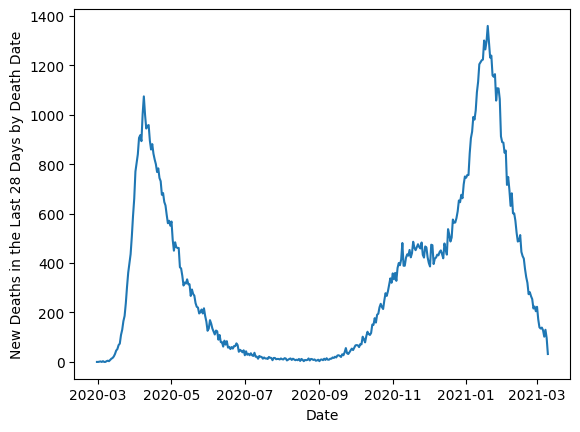

In [28]:
deaths_df_clean = deaths_df_clean.copy()

deaths_df_clean['date'] = pd.to_datetime(deaths_df_clean['date'], format='%d/%m/%Y')
plt.plot(deaths_df_clean['date'], deaths_df_clean['newDeaths28DaysByDeathDate'])
plt.xlabel('Date')
plt.ylabel('New Deaths in the Last 28 Days by Death Date')
plt.show()


This relatively matches cummulative deaths, high rise, leveling out before sharply rising again

Lets try new deaths and cum deaths together

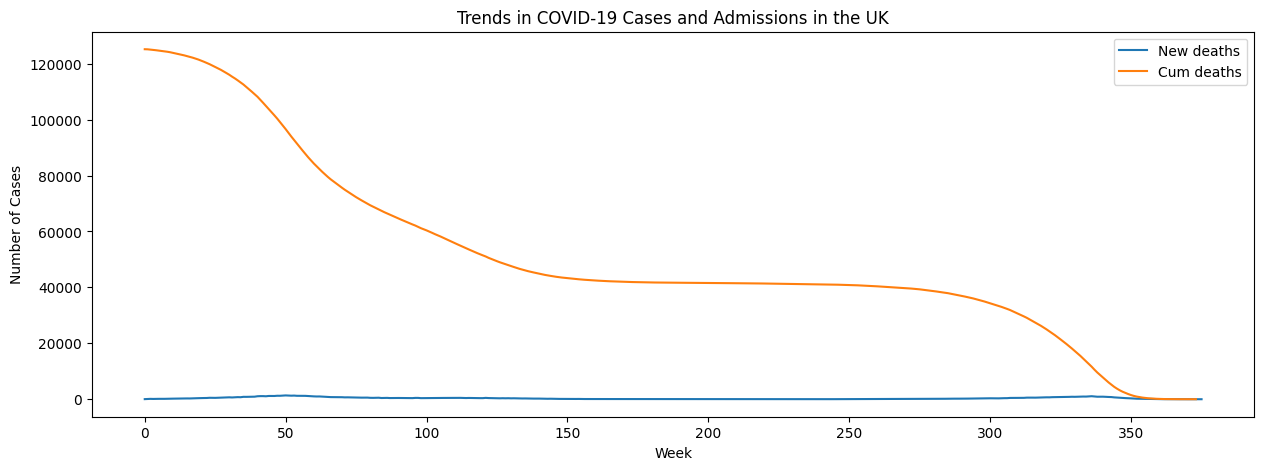

In [29]:

plt.figure(figsize=(15, 5))
plt.plot(deaths_df_clean.index, deaths_df_clean['newDeaths28DaysByDeathDate'], label='New deaths')
plt.plot(deaths_df_clean.index, deaths_df_clean['cumDeaths28DaysByDeathDate'], label='Cum deaths')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.title('Trends in COVID-19 Cases and Admissions in the UK')
plt.show()

Different scales here make this graph not very insightful unfortunately

#Combined data sets (3)

We combine all 3 sets on date - initially and check usually data and its contents

In [30]:

deaths_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/Deaths.csv')
cases_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/ConfirmedCasesByDateReported.csv')
admissions_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/PatientNewAdmissions.csv')

merged_df_3 = pd.merge(deaths_df, cases_df, on='date')
merged_df_3 = pd.merge(merged_df_3, admissions_df, on='date')

print(merged_df_3.head())
merged_df_3.isnull().sum()
merged_df_3.duplicated().sum()



       areaName_x       date  newDeaths28DaysByDeathDate  \
0  United Kingdom   2/2/2021                         846   
1  United Kingdom   1/2/2021                         887   
2  United Kingdom  31/1/2021                         889   
3  United Kingdom  30/1/2021                         912   
4  United Kingdom  29/1/2021                        1063   

   cumDeaths28DaysByDeathDate      areaName_y  newCasesByPublishDate  \
0                    111701.0  United Kingdom                  16840   
1                    110855.0  United Kingdom                  18607   
2                    109968.0  United Kingdom                  21088   
3                    109079.0  United Kingdom                  23275   
4                    108167.0  United Kingdom                  29079   

         areaName  newAdmissions  
0  United Kingdom           2460  
1  United Kingdom           2590  
2  United Kingdom           2379  
3  United Kingdom           2447  
4  United Kingdom           266

0

Long anticipated heatmap + correlation matrix, sicne we have more variables we can try find some meaningfulness now

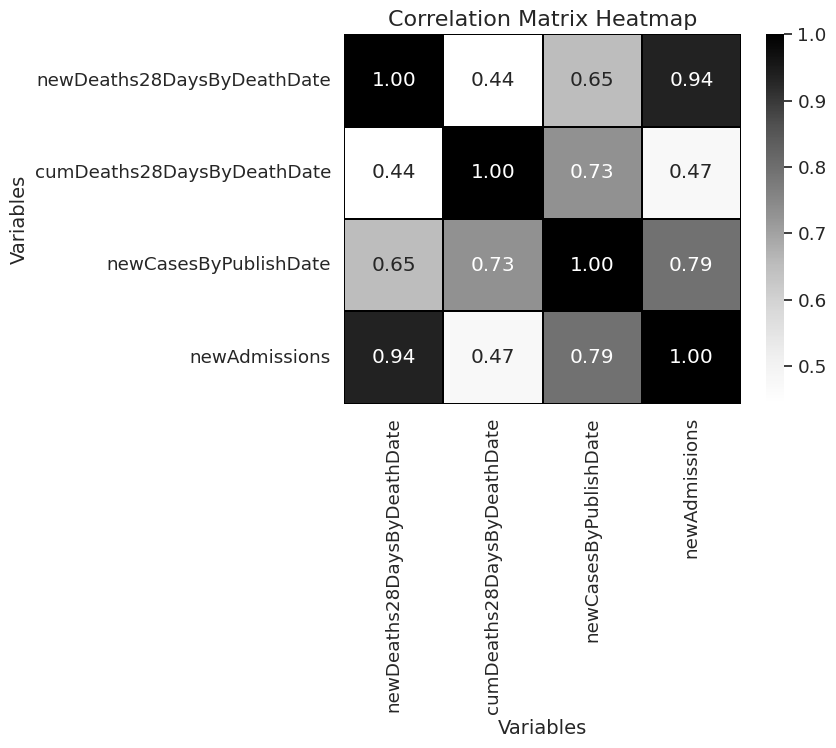

In [31]:
corr_matrix = merged_df_3.corr(numeric_only= True)

sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.heatmap(corr_matrix, cmap='Greys', annot=True, fmt='.2f', linewidths=.10, linecolor='black')

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.show()

Correlation matrix shows clear and strong correlation between deaths and admissions - positive correlation and that makes sense but new admissions and deaths go hand in hand Also when people die they can accept more people 


Lets check types of our data

In [32]:
print(merged_df_3.dtypes)


areaName_x                     object
date                           object
newDeaths28DaysByDeathDate      int64
cumDeaths28DaysByDeathDate    float64
areaName_y                     object
newCasesByPublishDate           int64
areaName                       object
newAdmissions                   int64
dtype: object


WE ahvewrong types ! lets fix it


In [33]:
merged_df_3['date'] = pd.to_datetime(merged_df_3['date'], format='%d/%m/%Y')

merged_df_3['cumDeaths28DaysByDeathDate'] = merged_df_3['cumDeaths28DaysByDeathDate'].astype(int)



In [34]:
print(merged_df_3.dtypes)



areaName_x                            object
date                          datetime64[ns]
newDeaths28DaysByDeathDate             int64
cumDeaths28DaysByDeathDate             int64
areaName_y                            object
newCasesByPublishDate                  int64
areaName                              object
newAdmissions                          int64
dtype: object


In [35]:
print(merged_df_3)


         areaName_x       date  newDeaths28DaysByDeathDate  \
0    United Kingdom 2021-02-02                         846   
1    United Kingdom 2021-02-01                         887   
2    United Kingdom 2021-01-31                         889   
3    United Kingdom 2021-01-30                         912   
4    United Kingdom 2021-01-29                        1063   
..              ...        ...                         ...   
312  United Kingdom 2020-03-27                         398   
313  United Kingdom 2020-03-26                         361   
314  United Kingdom 2020-03-25                         303   
315  United Kingdom 2020-03-24                         237   
316  United Kingdom 2020-03-23                         186   

     cumDeaths28DaysByDeathDate      areaName_y  newCasesByPublishDate  \
0                        111701  United Kingdom                  16840   
1                        110855  United Kingdom                  18607   
2                        109968  

In [36]:
merged_df_3.isnull().sum()


areaName_x                    0
date                          0
newDeaths28DaysByDeathDate    0
cumDeaths28DaysByDeathDate    0
areaName_y                    0
newCasesByPublishDate         0
areaName                      0
newAdmissions                 0
dtype: int64

In [37]:
merged_df_3_clean= merged_df_3.dropna()

In [38]:

merged_df_3.to_csv('merged_data.csv', index=False)

from google.colab import files
files.download('merged_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating and Downloading csv to manually inspect issues

Due to several issues with making any graphs or EDA etc I decided to merge those data sets differently

In [39]:

deaths_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/Deaths.csv')

cases_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/ConfirmedCasesByDateReported.csv')

admissions_df = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/PatientNewAdmissions.csv')

merged_df_new = pd.merge(deaths_df, cases_df, on=['date', 'areaName'], how='outer')
merged_df_new = pd.merge(merged_df_new, admissions_df, on=['date', 'areaName'], how='outer')

# Save the merged data set as a CSV file
#merged_df_new.to_csv('merged_data.csv', index=False)
#from google.colab import files
#files.download('merged_data.csv')



Lots of null values now! Lets fix it

In [40]:
merged_df_new.isnull().sum()

areaName                        0
date                            0
newDeaths28DaysByDeathDate     45
cumDeaths28DaysByDeathDate     47
newCasesByPublishDate           0
newAdmissions                 104
dtype: int64

In [41]:
merged_df_3_new_clean= merged_df_new.dropna()

In [42]:
merged_df_3_new_clean.isnull().sum()

areaName                      0
date                          0
newDeaths28DaysByDeathDate    0
cumDeaths28DaysByDeathDate    0
newCasesByPublishDate         0
newAdmissions                 0
dtype: int64

In [43]:
merged_df_3_new_clean.duplicated().sum()

0

Below we try to extract already known data and graphs to mainly check if we merged sets correctly

Fo rexample here date format is really badly formated

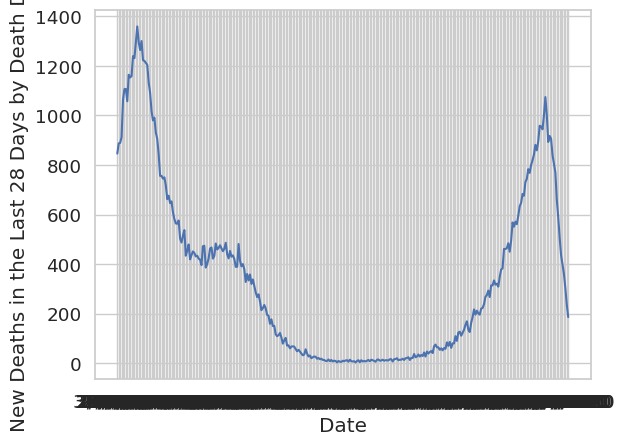

In [44]:
plt.plot(merged_df_3_new_clean['date'], merged_df_3_new_clean['newDeaths28DaysByDeathDate'])
plt.xlabel('Date')
plt.ylabel('New Deaths in the Last 28 Days by Death Date')
plt.show()


Some cleaning and manipulation of dataframe and data

In [45]:
print(merged_df_3_new_clean.dtypes)


areaName                       object
date                           object
newDeaths28DaysByDeathDate    float64
cumDeaths28DaysByDeathDate    float64
newCasesByPublishDate           int64
newAdmissions                 float64
dtype: object


In [46]:
merged_df_3_new_clean['date'] = pd.to_datetime(merged_df_3_new_clean['date'], format='%d/%m/%Y')

<ipython-input-46-489e54dbd6c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_3_new_clean['date'] = pd.to_datetime(merged_df_3_new_clean['date'], format='%d/%m/%Y')


In [47]:
merged_df_3_new_clean = merged_df_3_new_clean.copy()

merged_df_3_new_clean.loc[:, 'date'] = pd.to_datetime(merged_df_3_new_clean['date'], format='%d/%m/%Y')

<ipython-input-47-1b4d5c5b00b9>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_df_3_new_clean.loc[:, 'date'] = pd.to_datetime(merged_df_3_new_clean['date'], format='%d/%m/%Y')


In [48]:
print(merged_df_3_new_clean.dtypes)


areaName                              object
date                          datetime64[ns]
newDeaths28DaysByDeathDate           float64
cumDeaths28DaysByDeathDate           float64
newCasesByPublishDate                  int64
newAdmissions                        float64
dtype: object


Fixed data format and is more clean to look at

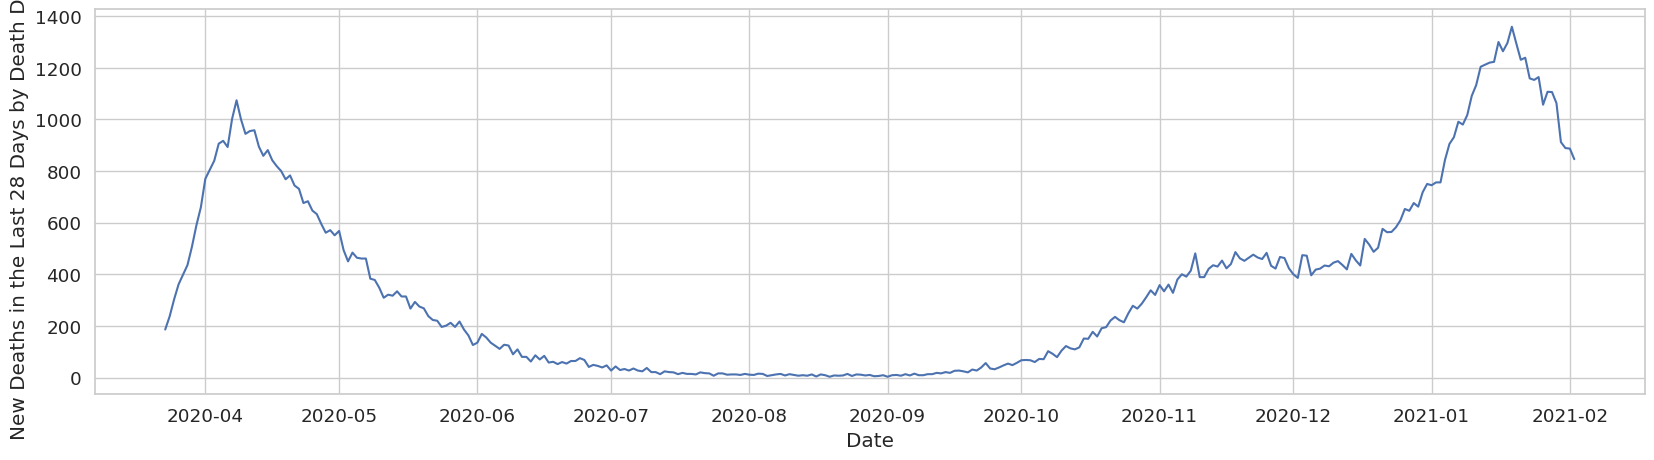

In [49]:
plt.figure(figsize=(20,5))

plt.plot(merged_df_3_new_clean['date'], merged_df_3_new_clean['newDeaths28DaysByDeathDate'])
plt.xlabel('Date')
plt.ylabel('New Deaths in the Last 28 Days by Death Date')
plt.show()


Lets compare admissions deaths and cases, individually and then all together

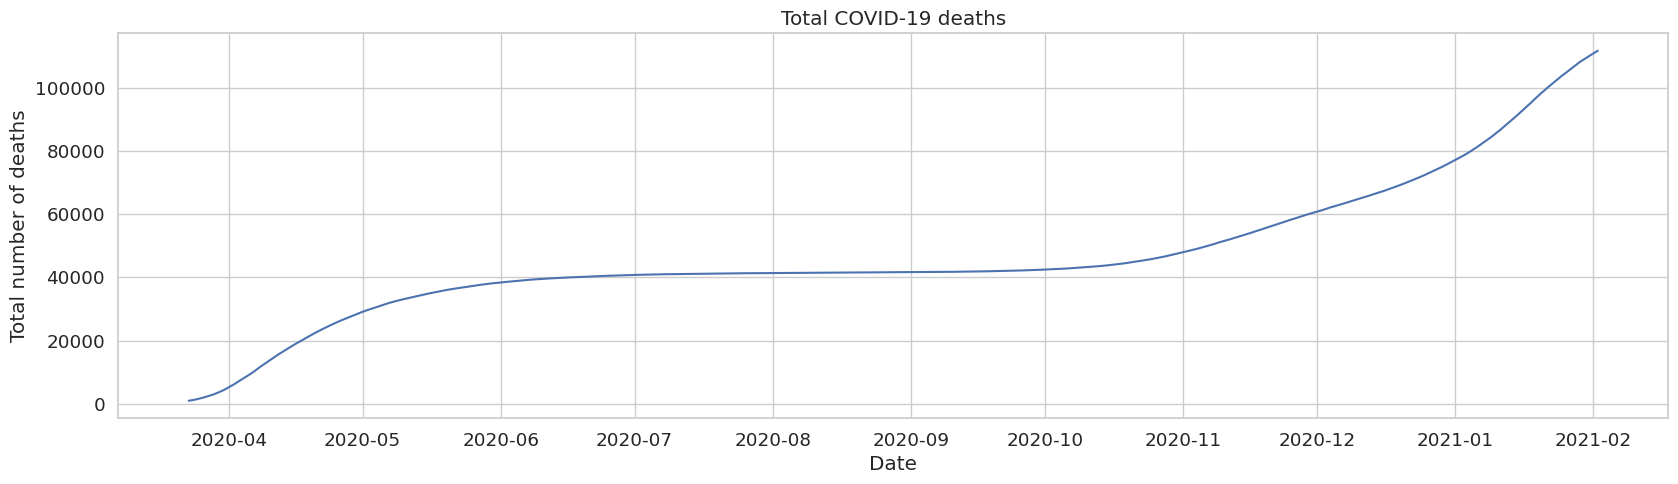

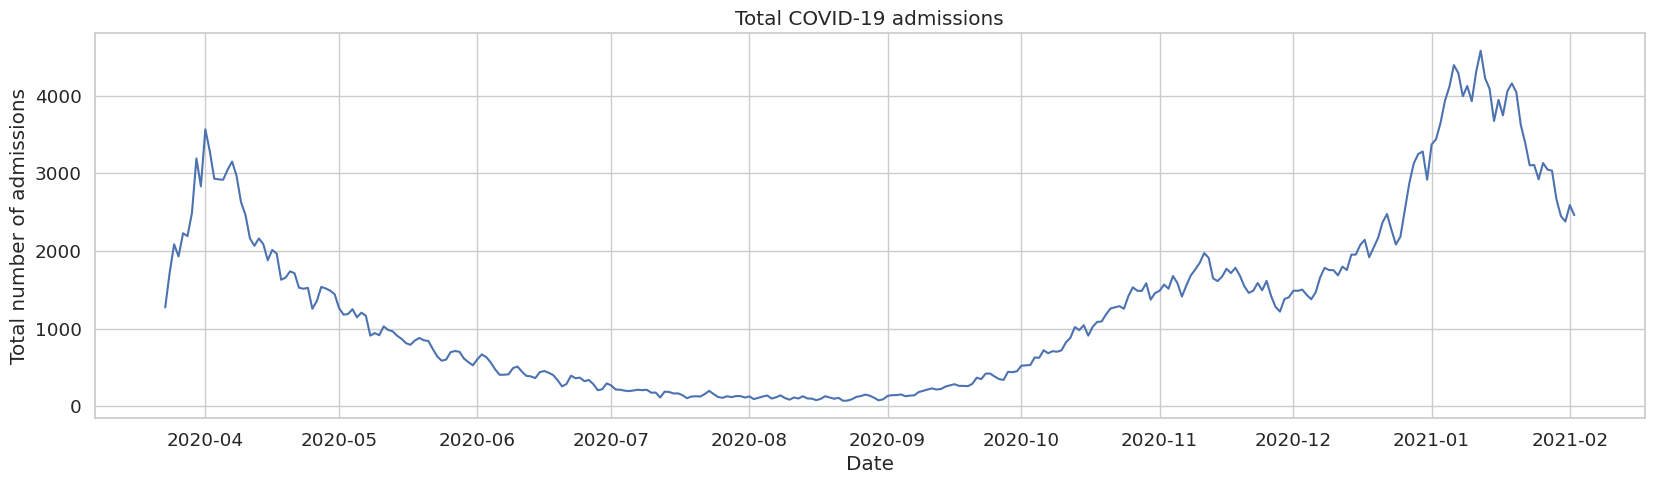

In [50]:

merged_df_final = pd.read_csv('https://raw.githubusercontent.com/KamilSzczepankiewicz/data_mining/main/merged_data-3.csv')

merged_df_final['date'] = pd.to_datetime(merged_df_final['date'])


plt.figure(figsize=(20,5))

plt.plot(merged_df_final['date'], merged_df_final['cumDeaths28DaysByDeathDate'])
plt.xlabel('Date')
plt.ylabel('Total number of deaths')
plt.title('Total COVID-19 deaths')
plt.show()

plt.figure(figsize=(20,5))

plt.plot(merged_df_final['date'], merged_df_final['newAdmissions'])
plt.xlabel('Date')
plt.ylabel('Total number of admissions')
plt.title('Total COVID-19 admissions')
plt.show()



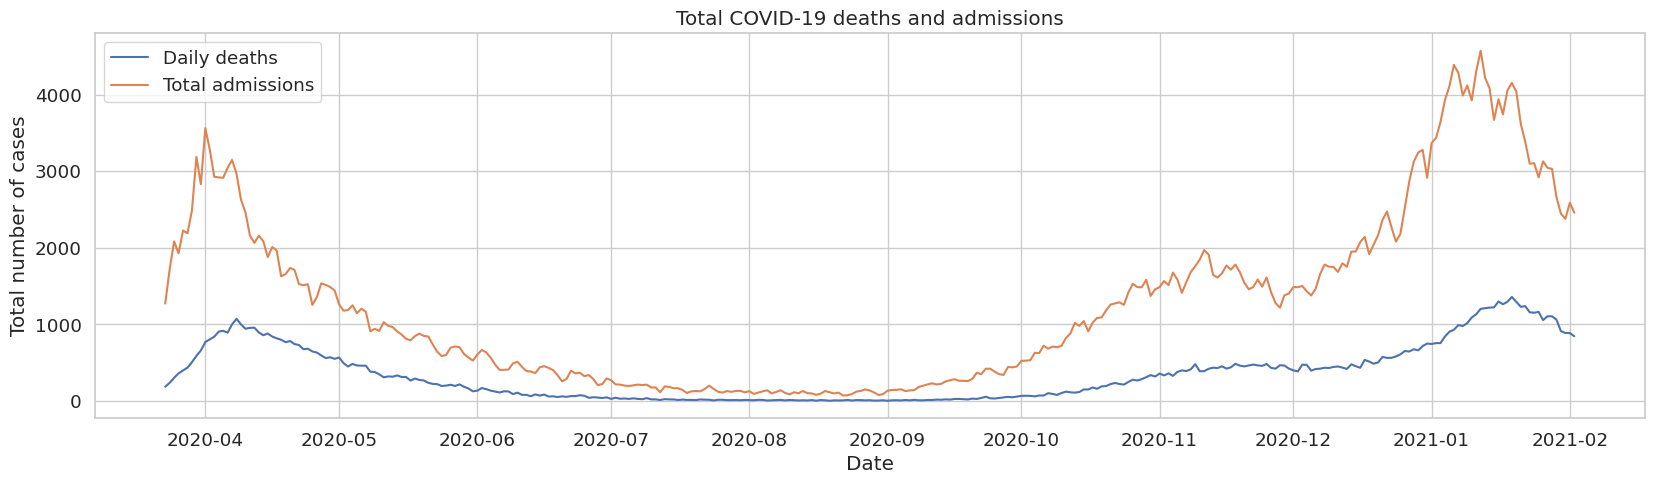

In [51]:

merged_df_final['date'] = pd.to_datetime(merged_df_final['date'])

plt.figure(figsize=(20,5))
plt.plot(merged_df_final['date'], merged_df_final['newDeaths28DaysByDeathDate'], label='Daily deaths')
plt.plot(merged_df_final['date'], merged_df_final['newAdmissions'], label='Total admissions')

plt.xlabel('Date')
plt.ylabel('Total number of cases')
plt.title('Total COVID-19 deaths and admissions')
plt.legend()
plt.show()


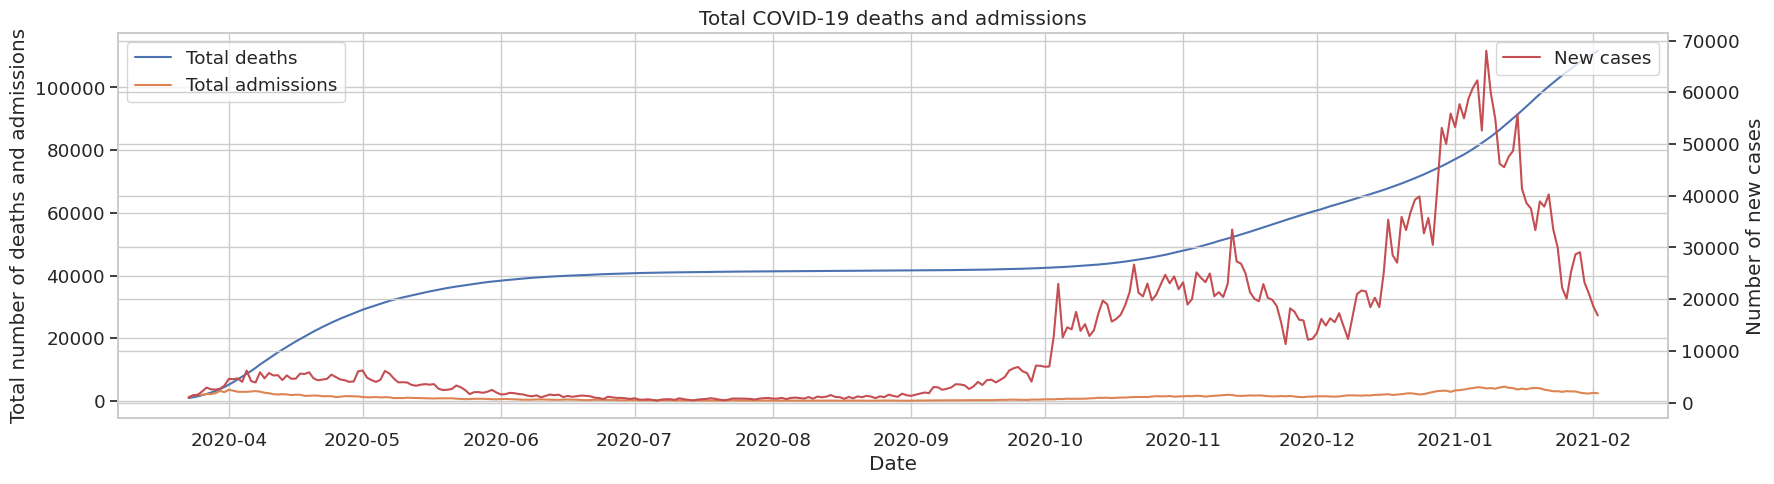

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df_final['date'] = pd.to_datetime(merged_df_final['date'])

fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.plot(merged_df_final['date'], merged_df_final['cumDeaths28DaysByDeathDate'], label='Total deaths')
ax1.plot(merged_df_final['date'], merged_df_final['newAdmissions'], label='Total admissions')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total number of deaths and admissions')
ax1.set_title('Total COVID-19 deaths and admissions')

ax2 = ax1.twinx()
ax2.plot(merged_df_final['date'], merged_df_final['newCasesByPublishDate'], 'r-', label='New cases')
ax2.set_ylabel('Number of new cases')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


Even though we can say there is scaling issue here, its relatively small, we can clearly observe that Total deaths really peak compared to admissions and are nearly as high as New cases. Again we can theorise: 3 outcomes:
Either Data is bad,
Hospital got overwhelmed being unable to treat people,
Old and sick population suffered alot due to severity of covid for people vulnerable to it

Noticed that previous heatmap was done on wrongly merged data set but it seems new one matches old one too

<ipython-input-53-aa861f057088>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df_final.corr()


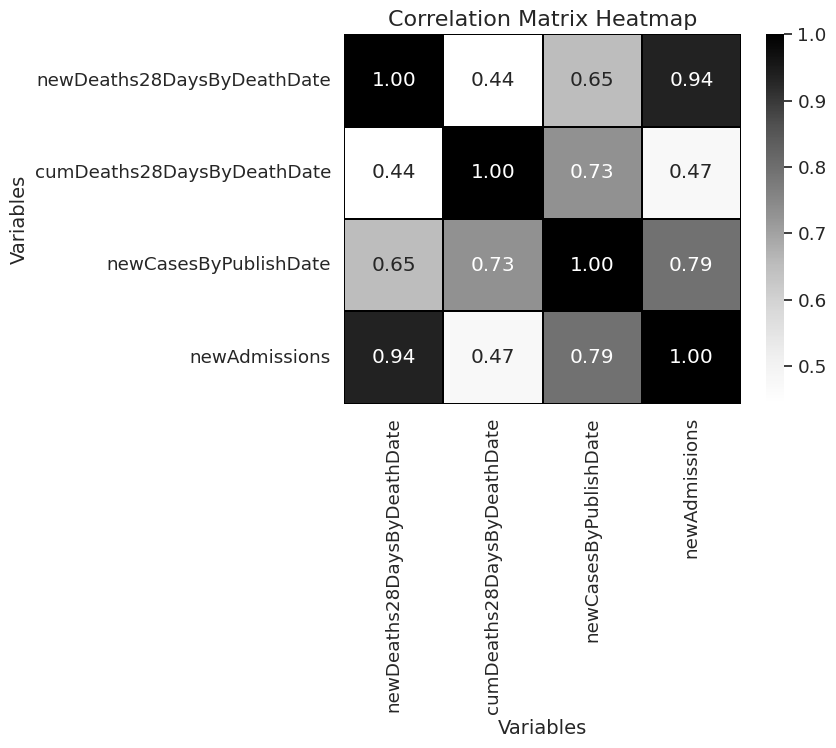

In [53]:
corr_matrix = merged_df_final.corr()

sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.heatmap(corr_matrix, cmap='Greys', annot=True, fmt='.2f', linewidths=.10, linecolor='black')

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.show()

#Machine Learning forecast + Pattern recognition

Lets try to apply some machine learning forecast to our data set

In [54]:
merged_df_final['date'] = pd.to_datetime(merged_df_final['date'], format='%d/%m/%Y')


SARIMAX is a  forecasting model that can capture patterns, trends, and seasonality in the data. It is  used to predict future values based on historical data.




Optimization terminated successfully.
         Current function value: 4.647173
         Iterations: 4
         Function evaluations: 375


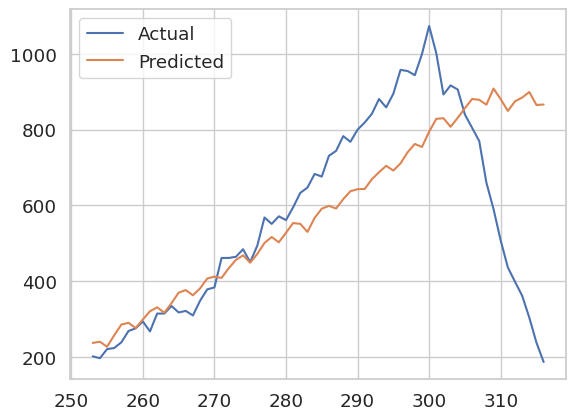

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(merged_df_final) * 0.8)
train_data, test_data = merged_df_final[0:train_size], merged_df_final[train_size:len(merged_df_final)]

model = SARIMAX(train_data['newDeaths28DaysByDeathDate'], exog=train_data['newAdmissions'], order=(2, 1, 2), seasonal_order=(2, 1, 1, 4))
model_fit = model.fit(maxiter=1000, method='powell')

start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index, exog=test_data['newAdmissions'])

plt.plot(test_data.index, test_data['newDeaths28DaysByDeathDate'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.legend(loc='upper left')
plt.show()


In the provided code, we are  splitting the data into training and testing sets using an 80/20 ratio to avoid overfitting, but its possible that model is bad due to noise in training set, otherwise prediction looks acceptable and correct to some degree



Lets try checking linear regression:


In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = merged_df_final

X = data[['newAdmissions', 'newCasesByPublishDate']]
y = data['newDeaths28DaysByDeathDate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


Mean squared error: 8276.044035600082


An MSE of 20,235.816 signifies that, on average, the predicted values deviate from the actual values by roughly the square root of 20,235.816, which is approximately 142.24 units. This high degree of error suggests that the model may not provide a suitable fit for the data.

Lets write similar implementation of SARIMAX model but with method that finds best values for the seasonal order

Optimization terminated successfully.
         Current function value: 4.850864
         Iterations: 2
         Function evaluations: 89
Optimization terminated successfully.
         Current function value: 4.613233
         Iterations: 2
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 4.613102
         Iterations: 2
         Function evaluations: 81
Optimization terminated successfully.
         Current function value: 4.732562
         Iterations: 2
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: 4.613186
         Iterations: 4
         Function evaluations: 172
Optimization terminated successfully.
         Current function value: 4.613215
         Iterations: 2
         Function evaluations: 106
Optimization terminated successfully.
         Current function value: 4.713558
         Iterations: 2
         Function evaluations: 81
Optimization terminated successfully.
 

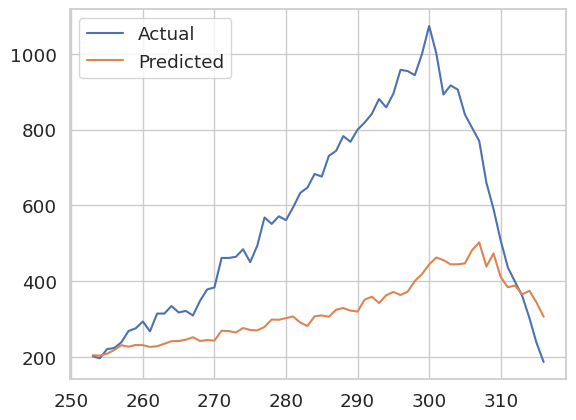

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import warnings

train_size = int(len(merged_df_final) * 0.8)
train_data, test_data = merged_df_final[0:train_size], merged_df_final[train_size:len(merged_df_final)]

p = q = range(0, 3)
d = range(1, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]

best_aic = float('inf')
best_order = None
best_seasonal_order = None
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train_data['newDeaths28DaysByDeathDate'], exog=train_data['newAdmissions'], order=param, seasonal_order=param_seasonal)
            model_fit = model.fit(maxiter=1000, method='powell')
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = param
                best_seasonal_order = param_seasonal
        except:
            continue

print(f"Best parameters: order={best_order} seasonal_order={best_seasonal_order}")

model = SARIMAX(train_data['newDeaths28DaysByDeathDate'], exog=train_data['newAdmissions'], order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit(maxiter=1000, method='powell')

start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index, exog=test_data['newAdmissions'])

plt.plot(test_data.index, test_data['newDeaths28DaysByDeathDate'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.legend(loc='upper left')
plt.show()


This predictiom seems more accurate in terms of shape, but it did not predict accurately number of cases however, pattern of slowly rising and then peaking + drop, was achieved

Lets try Holt-Winters Exponential Smoothing method to forecast cumulative COVID-19 deaths for a given test dataset. 

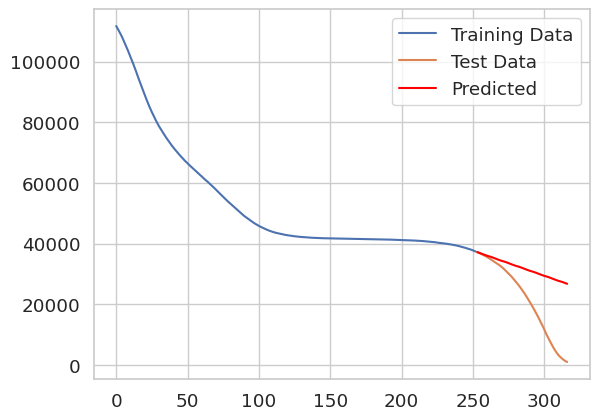

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_size = int(len(merged_df_final) * 0.8)
train_data = merged_df_final['cumDeaths28DaysByDeathDate'][:train_size]
test_data = merged_df_final['cumDeaths28DaysByDeathDate'][train_size:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=10)
fit = model.fit()

steps = len(test_data)
predictions = fit.forecast(steps=steps)

plt.plot(merged_df_final.index[:train_size], train_data, label='Training Data')
plt.plot(merged_df_final.index[train_size:], test_data, label='Test Data')
plt.plot(merged_df_final.index[train_size:], predictions.values, label='Predicted', color='red')
plt.legend()
plt.show()


As we can see predicted(red) does not follow Test data, it deviates strongly, it can mean that model is bad, code is bad or data set is not good enoough, I believe its mainly issue with data set

Time for Decision tree

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
Mean squared error: 6479.426939877776
Root mean squared error: 80.49488766299247


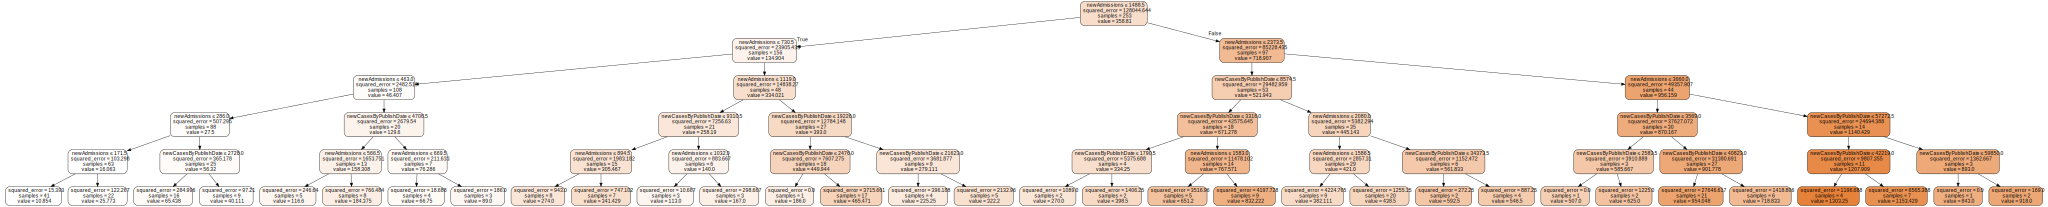

In [59]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz

X = merged_df_final[['newAdmissions', 'newCasesByPublishDate']]
y = merged_df_final['newDeaths28DaysByDeathDate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': range(2, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

rmse = np.sqrt(mse)
print('Root mean squared error:', rmse)

dot_data = export_graphviz(best_model, out_file=None,
                           feature_names=X.columns.tolist(),
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph


An RMSE of 80.49 indicates that, on average, the model's predictions are about 80.49 units away from the true values. 

So decision tree is bad way to find/predict anything

Lets try implemeting Long Short-Term Memory (LSTM) neural network to forecast the 'newDeaths28DaysByDeathDate' variable based on a sequence of previous values. 

In [60]:
from tensorflow import keras

Epoch 0 train loss: 0.2809 test loss: 0.6337
Epoch 10 train loss: 0.0789 test loss: 0.6991
Epoch 20 train loss: 0.0375 test loss: 0.5061
Epoch 30 train loss: 0.0182 test loss: 0.2568
Epoch 40 train loss: 0.0110 test loss: 0.2647
Epoch 50 train loss: 0.0077 test loss: 0.2547
Epoch 60 train loss: 0.0047 test loss: 0.2448
Epoch 70 train loss: 0.0041 test loss: 0.2630
Epoch 80 train loss: 0.0037 test loss: 0.2872
Epoch 90 train loss: 0.0036 test loss: 0.2883
Epoch 100 train loss: 0.0035 test loss: 0.3005
Epoch 110 train loss: 0.0035 test loss: 0.2878
Epoch 120 train loss: 0.0034 test loss: 0.2710
Epoch 130 train loss: 0.0033 test loss: 0.2575
Epoch 140 train loss: 0.0031 test loss: 0.2451
Epoch 150 train loss: 0.0028 test loss: 0.2384
Epoch 160 train loss: 0.0026 test loss: 0.2365
Epoch 170 train loss: 0.0023 test loss: 0.2362
Epoch 180 train loss: 0.0021 test loss: 0.2360
Epoch 190 train loss: 0.0019 test loss: 0.2351
Epoch 200 train loss: 0.0017 test loss: 0.2336
Epoch 210 train loss: 0.

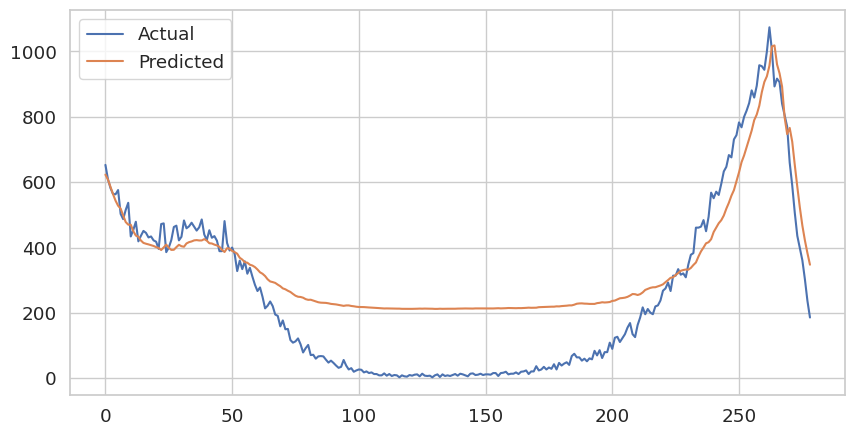

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 7

X, y = prepare_data(merged_df_final['newDeaths28DaysByDeathDate'], n_steps)

train_size = int(len(X) * 0.1)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
train_y, test_y = y[0:train_size], y[train_size:len(y)]


scaler = MinMaxScaler()
train_X = torch.Tensor(train_X)
train_y = torch.Tensor(train_y)
test_X = torch.Tensor(test_X)
test_y = torch.Tensor(test_y)

test_y = test_y.reshape(len(test_y), 1)

scaler.fit(train_X.reshape(-1, 1))
train_X = scaler.transform(train_X.reshape(-1, 1)).reshape(train_X.shape)
train_y = scaler.transform(train_y.reshape(-1, 1)).reshape(train_y.shape)
test_X = scaler.transform(test_X.reshape(-1, 1)).reshape(test_X.shape)
test_y = scaler.transform(test_y).reshape(test_y.shape)

train_X = torch.Tensor(train_X).unsqueeze(2)
train_y = torch.Tensor(train_y).unsqueeze(1)
test_X = torch.Tensor(test_X).unsqueeze(2)
test_y = torch.Tensor(test_y).unsqueeze(1)

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out

input_dim = 1
hidden_dim = 50
output_dim = 1
model = LSTM(input_dim, hidden_dim, output_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

n_epochs = 300
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(train_X)
    loss = criterion(y_pred, train_y)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        y_test_pred = model(test_X)
        test_loss = criterion(y_test_pred, test_y)
        test_losses.append(test_loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch} train loss: {train_losses[-1]:.4f} test loss: {test_losses[-1]:.4f}')

model.eval()
with torch.no_grad():
    y_pred = model(test_X)
    
inv_y = scaler.inverse_transform(test_y.reshape(-1, 1)).squeeze()
inv_y_pred = scaler.inverse_transform(y_pred.detach().numpy()).squeeze()


plt.figure(figsize=(10,5))
plt.plot(inv_y, label='Actual')
plt.plot(inv_y_pred, label='Predicted')
plt.legend()
plt.show()


This was trained on 10% of entirety of whole set, so results are extremelly good and to be honest - surprising. Is the model so good? Did I mess something up? But its forecasting really close to actual factual data

Lets try using same method, however training on newCases instead

Epoch 0 train loss: 0.0242 test loss: 0.1493
Epoch 10 train loss: 0.0152 test loss: 0.1788
Epoch 20 train loss: 0.0141 test loss: 0.1672
Epoch 30 train loss: 0.0136 test loss: 0.1656
Epoch 40 train loss: 0.0131 test loss: 0.1769
Epoch 50 train loss: 0.0128 test loss: 0.1690
Epoch 60 train loss: 0.0125 test loss: 0.1720
Epoch 70 train loss: 0.0124 test loss: 0.1721
Epoch 80 train loss: 0.0123 test loss: 0.1716
Epoch 90 train loss: 0.0123 test loss: 0.1717
Epoch 100 train loss: 0.0122 test loss: 0.1721
Epoch 110 train loss: 0.0121 test loss: 0.1723
Epoch 120 train loss: 0.0120 test loss: 0.1727
Epoch 130 train loss: 0.0119 test loss: 0.1732
Epoch 140 train loss: 0.0118 test loss: 0.1738
Epoch 150 train loss: 0.0115 test loss: 0.1745
Epoch 160 train loss: 0.0113 test loss: 0.1746
Epoch 170 train loss: 0.0111 test loss: 0.1732
Epoch 180 train loss: 0.0118 test loss: 0.1690
Epoch 190 train loss: 0.0112 test loss: 0.1775
Epoch 200 train loss: 0.0110 test loss: 0.1710
Epoch 210 train loss: 0.

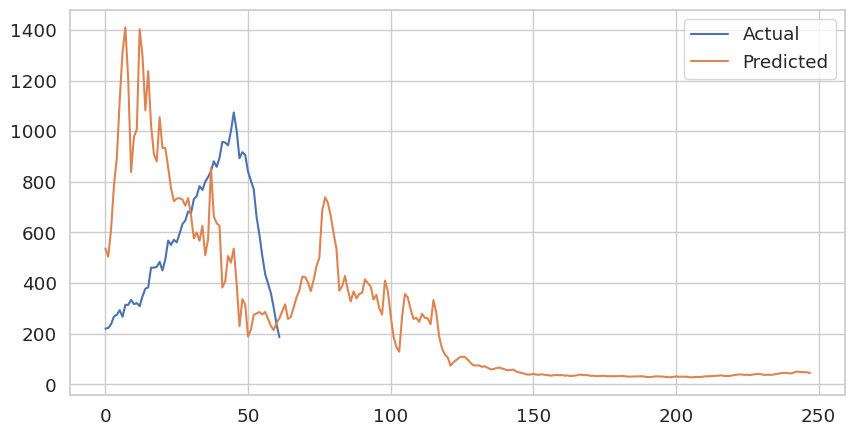

In [62]:
def prepare_data(data_x, data_y, n_steps):
    X, y = [], []
    for i in range(len(data_x)):
        end_ix = i + n_steps
        if end_ix > len(data_x) - 1:
            break
        seq_x, seq_y = data_x[i:end_ix], data_y[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
n_steps = 7
X, y = prepare_data(merged_df_final['newCasesByPublishDate'], merged_df_final['newDeaths28DaysByDeathDate'], n_steps)

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(train_X.reshape(-1, 1))
scaler_y.fit(train_y.reshape(-1, 1))

train_X = scaler_x.transform(train_X.reshape(-1, 1)).reshape(train_X.shape)
train_y = scaler_y.transform(train_y.reshape(-1, 1)).reshape(train_y.shape)
test_X = scaler_x.transform(test_X.reshape(-1, 1)).reshape(test_X.shape)
test_y = scaler_y.transform(test_y.reshape(-1, 1)).reshape(test_y.shape)

train_X = torch.Tensor(train_X).unsqueeze(2)
train_y = torch.Tensor(train_y).unsqueeze(1)
test_X = torch.Tensor(test_X).unsqueeze(2)
test_y = torch.Tensor(test_y).unsqueeze(1)

n_epochs = 300
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(train_X)
    loss = criterion(y_pred, train_y)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        y_test_pred = model(test_X)
        test_loss = criterion(y_test_pred, test_y)
        test_losses.append(test_loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch} train loss: {train_losses[-1]:.4f} test loss: {test_losses[-1]:.4f}')

inv_y = scaler_y.inverse_transform(test_y.reshape(-1, 1)).squeeze()
inv_y_pred = scaler_y.inverse_transform(y_pred.detach().numpy()).squeeze()

plt.figure(figsize=(10,5))
plt.plot(inv_y, label='Actual')
plt.plot(inv_y_pred, label='Predicted')
plt.legend()
plt.show()


I woudl say its relatively good prediction and it suffers from issue of scales, however initial shape matches quite well,however it trained on 80% of the data to predict remaining 20%. Considering this, seems like bad prediction/model

Another attempt and approach to neural network

Epoch 0 train loss: 0.2151 test loss: 0.0799
Epoch 10 train loss: 0.0378 test loss: 0.1165
Epoch 20 train loss: 0.0055 test loss: 0.0417
Epoch 30 train loss: 0.0012 test loss: 0.0574
Epoch 40 train loss: 0.0004 test loss: 0.0441
Epoch 50 train loss: 0.0003 test loss: 0.0425
Epoch 60 train loss: 0.0002 test loss: 0.0424
Epoch 70 train loss: 0.0001 test loss: 0.0424
Epoch 80 train loss: 0.0001 test loss: 0.0427
Epoch 90 train loss: 0.0001 test loss: 0.0432
Epoch 100 train loss: 0.0001 test loss: 0.0436
Epoch 110 train loss: 0.0001 test loss: 0.0442
Epoch 120 train loss: 0.0001 test loss: 0.0448
Epoch 130 train loss: 0.0001 test loss: 0.0457
Epoch 140 train loss: 0.0000 test loss: 0.0465
Epoch 150 train loss: 0.0000 test loss: 0.0474
Epoch 160 train loss: 0.0000 test loss: 0.0484
Epoch 170 train loss: 0.0000 test loss: 0.0493
Epoch 180 train loss: 0.0000 test loss: 0.0503
Epoch 190 train loss: 0.0000 test loss: 0.0512
Epoch 200 train loss: 0.0000 test loss: 0.0521
Epoch 210 train loss: 0.

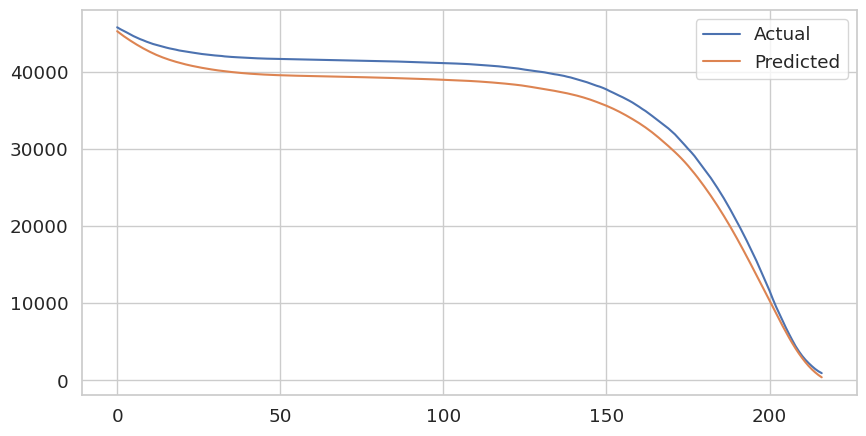

In [63]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 7

X, y = prepare_data(merged_df_final['cumDeaths28DaysByDeathDate'], n_steps)

# Split of 30% the data into training and testing sets
train_size = int(len(X) * 0.3)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size,:], X[train_size:len(X),:]
train_y, test_y = y[0:train_size], y[train_size:len(y)]


## We need to scale the data to the range [0, 1] for use in the PyTorch model
scaler = MinMaxScaler()
train_X = torch.Tensor(train_X)
train_y = torch.Tensor(train_y)
test_X = torch.Tensor(test_X)
test_y = torch.Tensor(test_y)

test_y = test_y.reshape(len(test_y), 1)

scaler.fit(train_X.reshape(-1, 1))
train_X = scaler.transform(train_X.reshape(-1, 1)).reshape(train_X.shape)
train_y = scaler.transform(train_y.reshape(-1, 1)).reshape(train_y.shape)
test_X = scaler.transform(test_X.reshape(-1, 1)).reshape(test_X.shape)
test_y = scaler.transform(test_y).reshape(test_y.shape)

train_X = torch.Tensor(train_X).unsqueeze(2)
train_y = torch.Tensor(train_y).unsqueeze(1)
test_X = torch.Tensor(test_X).unsqueeze(2)
test_y = torch.Tensor(test_y).unsqueeze(1)

class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out

input_dim = 1
hidden_dim = 50
output_dim = 1
model = LSTM(input_dim, hidden_dim, output_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# Train the PyTorch model
n_epochs = 300
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(train_X)
    loss = criterion(y_pred, train_y)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        y_test_pred = model(test_X)
        test_loss = criterion(y_test_pred, test_y)
        test_losses.append(test_loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch} train loss: {train_losses[-1]:.4f} test loss: {test_losses[-1]:.4f}')

model.eval()
with torch.no_grad():
    y_pred = model(test_X)

inv_y = scaler.inverse_transform(test_y.reshape(-1, 1)).squeeze()
inv_y_pred = scaler.inverse_transform(y_pred.detach().numpy()).squeeze()

rmse = np.sqrt(mean_squared_error(inv_y, inv_y_pred))
print('Root mean squared error:', rmse)

plt.figure(figsize=(10,5))
plt.plot(inv_y, label='Actual')
plt.plot(inv_y_pred, label='Predicted')
plt.legend()
plt.show()


So results are excellent, there is possbility of overfititng, however, our model has trained only on 30% of the data, that would explain perfect prediction in the beginning that deviates later on, however deviation isnt too bad, and prediction is nearly the same as actual data 

Now lets try to use admissions and cases to predict deaths

Epoch 0 train loss: 0.1411 test loss: 0.1903
Epoch 10 train loss: 0.0202 test loss: 0.0745
Epoch 20 train loss: 0.0176 test loss: 0.0621
Epoch 30 train loss: 0.0128 test loss: 0.0564
Epoch 40 train loss: 0.0088 test loss: 0.0416
Epoch 50 train loss: 0.0055 test loss: 0.0543
Epoch 60 train loss: 0.0054 test loss: 0.0498
Epoch 70 train loss: 0.0038 test loss: 0.0595
Epoch 80 train loss: 0.0043 test loss: 0.0841
Epoch 90 train loss: 0.0033 test loss: 0.1094
Epoch 100 train loss: 0.0040 test loss: 0.1056
Epoch 110 train loss: 0.0038 test loss: 0.1038
Epoch 120 train loss: 0.0025 test loss: 0.1116
Epoch 130 train loss: 0.0039 test loss: 0.1611
Epoch 140 train loss: 0.0031 test loss: 0.1818
Epoch 150 train loss: 0.0031 test loss: 0.1738
Epoch 160 train loss: 0.0021 test loss: 0.2275
Epoch 170 train loss: 0.0024 test loss: 0.2238
Epoch 180 train loss: 0.0024 test loss: 0.3100
Epoch 190 train loss: 0.0019 test loss: 0.2404
Epoch 200 train loss: 0.0027 test loss: 0.2419
Epoch 210 train loss: 0.

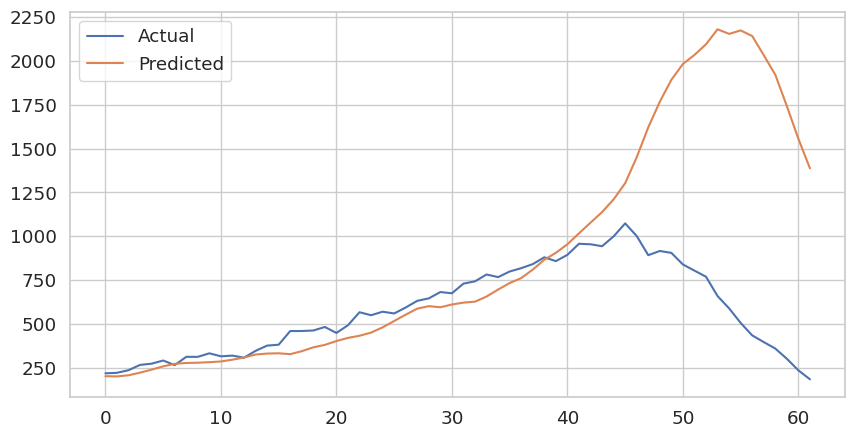

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def prepare_multivariate_data(data_x1, data_x2, data_y, n_steps):
    X1, X2, y = [], [], []
    for i in range(len(data_x1)):
        end_ix = i + n_steps
        if end_ix > len(data_x1) - 1:
            break
        seq_x1, seq_x2, seq_y = data_x1[i:end_ix], data_x2[i:end_ix], data_y[end_ix]
        X1.append(seq_x1)
        X2.append(seq_x2)
        y.append(seq_y)
    return np.array(X1), np.array(X2), np.array(y)

n_steps = 7

X1, X2, y = prepare_multivariate_data(merged_df_final['newAdmissions'], merged_df_final['newCasesByPublishDate'], merged_df_final['newDeaths28DaysByDeathDate'], n_steps)

train_size = int(len(X1) * 0.8)
test_size = len(X1) - train_size
train_X1, test_X1 = X1[0:train_size,:], X1[train_size:len(X1),:]
train_X2, test_X2 = X2[0:train_size,:], X2[train_size:len(X2),:]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

scaler_x1 = MinMaxScaler()
scaler_x2 = MinMaxScaler()
scaler_y = MinMaxScaler()

train_X1 = scaler_x1.fit_transform(train_X1)
train_X2 = scaler_x2.fit_transform(train_X2)
train_y = scaler_y.fit_transform(train_y.reshape(-1, 1)).flatten()
test_X1 = scaler_x1.transform(test_X1)
test_X2 = scaler_x2.transform(test_X2)
test_y = scaler_y.transform(test_y.reshape(-1, 1)).flatten()

train_X = np.stack((train_X1, train_X2), axis=2)
test_X = np.stack((test_X1, test_X2), axis=2)

train_X = torch.Tensor(train_X)
train_y = torch.Tensor(train_y).unsqueeze(1)
test_X = torch.Tensor(test_X)
test_y = torch.Tensor(test_y).unsqueeze(1)

class MultivariateLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        dropped_out = self.dropout(lstm_out[:, -1, :])
        out = self.fc(dropped_out)
        return out

input_dim = 2
hidden_dim = 50
output_dim = 1
model = MultivariateLSTM(input_dim, hidden_dim, output_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

n_epochs = 700
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(train_X)
    loss = criterion(y_pred, train_y)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        y_test_pred = model(test_X)
        test_loss = criterion(y_test_pred, test_y)
        test_losses.append(test_loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch} train loss: {train_losses[-1]:.4f} test loss: {test_losses[-1]:.4f}')

model.eval()
with torch.no_grad():
    y_pred = model(test_X)

inv_y = scaler_y.inverse_transform(test_y.reshape(-1, 1)).squeeze()
inv_y_pred = scaler_y.inverse_transform(y_pred.detach().numpy()).squeeze()

plt.figure(figsize=(10, 5))
plt.plot(inv_y, label='Actual')
plt.plot(inv_y_pred, label='Predicted')
plt.legend()
plt.show()


I would understand why it predicts deaths on such high level due to number of all cases and initial deaths. Possibly if we had access to more information like age, vaccinations it could predict better but we only have what we have now, so it is what it is



Create a Cluster Visualisation Plot

Elbow and silhouette methods are used to determine optimal clusters (k). Elbow identifies the point where WCSS stops decreasing significantly, while silhouette seeks the highest average silhouette score.
 


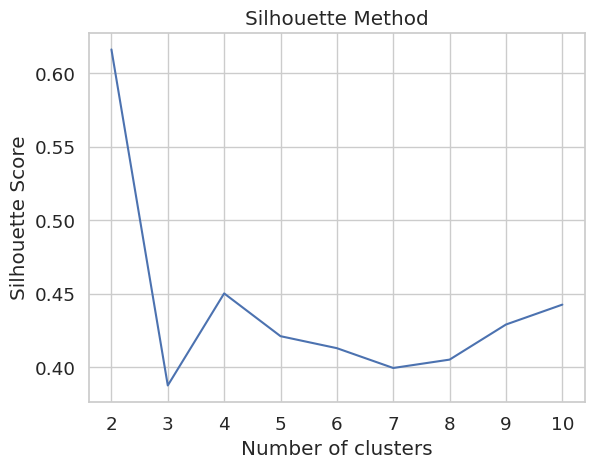

Optimal value is 2


In [65]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

merged_df_final = merged_df_final.dropna()

for col in merged_df_final.columns:
    if merged_df_final[col].dtype == 'datetime64[ns]':
        merged_df_final[col + '_year'] = merged_df_final[col].dt.year
        merged_df_final[col + '_month'] = merged_df_final[col].dt.month
        merged_df_final[col + '_day'] = merged_df_final[col].dt.day
        merged_df_final = merged_df_final.drop(col, axis=1)

merged_df_final = pd.get_dummies(merged_df_final)

scaler = StandardScaler()
scaled_merged_df_final = scaler.fit_transform(merged_df_final)

silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_merged_df_final)
    silhouette_avg = silhouette_score(scaled_merged_df_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

k_optimal = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal value is", k_optimal)


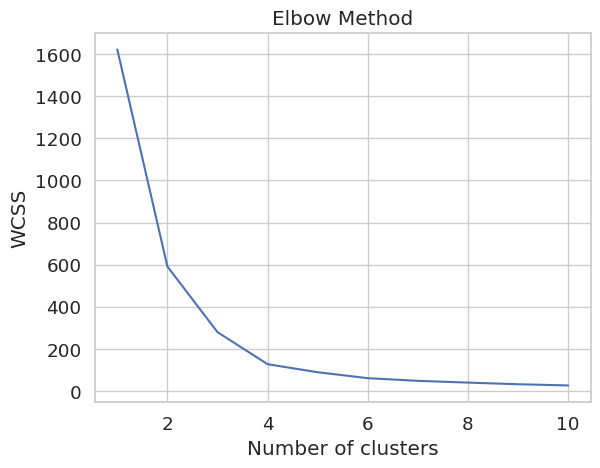

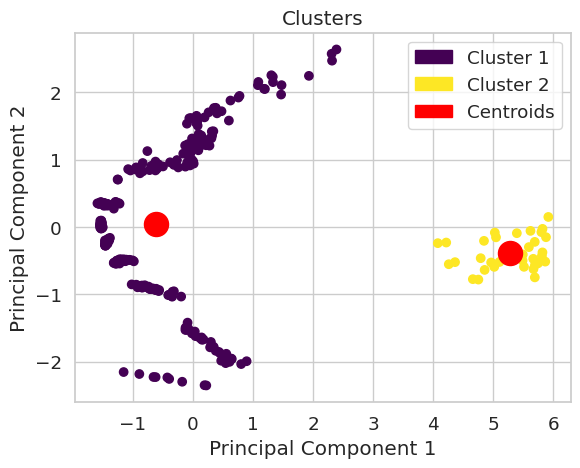

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = merged_df_final

for col in data.columns:
    if data[col].dtype == 'datetime64[ns]':
        data[col + '_year'] = data[col].dt.year
        data[col + '_month'] = data[col].dt.month
        data[col + '_day'] = data[col].dt.day
        data = data.drop(col, axis=1)

data = pd.get_dummies(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k_optimal = 2 #from silouthete score above
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principal_df)

plt.scatter(principal_df['principal_component_1'], principal_df['principal_component_2'], c=pred_y, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

import matplotlib.patches as mpatches

cluster_colors = plt.get_cmap('viridis')(np.linspace(0, 1, k_optimal))
legend_elements = [mpatches.Patch(color=cluster_colors[i], label=f'Cluster {i + 1}') for i in range(k_optimal)]

plt.legend(handles=legend_elements + [mpatches.Patch(color='red', label='Centroids')], loc='best')

plt.title('Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Lets try to understand what happens

In [67]:
data['cluster'] = pred_y

cluster_mean_values = data.groupby('cluster').mean()

print("Mean values of features for each cluster:")
print(cluster_mean_values)

Mean values of features for each cluster:
         newDeaths28DaysByDeathDate  cumDeaths28DaysByDeathDate  \
cluster                                                           
0                        266.253521                41312.440141   
1                       1070.696970                94129.818182   

         newCasesByPublishDate  newAdmissions  date_year  date_month  \
cluster                                                                
0                  8855.109155    1001.014085     2020.0    7.848592   
1                 41328.757576    3573.242424     2021.0    1.060606   

          date_day  areaName_United Kingdom  
cluster                                      
0        16.137324                      1.0  
1        15.121212                      1.0  


Cluster 0 and 1 correspond to different time lines and display different correlations. Cluster 0 is more focused on 2020 where we’re seeing lower death rates but higher cases whereas cluster1 focuses on 2021 higher death rates but lower new cases and admissions. Probably due to nhs being overwhelmed. Lets make it more readable


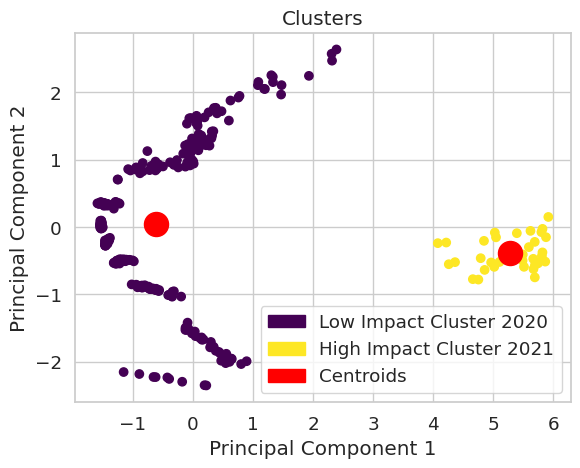

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

data = merged_df_final

for col in data.columns:
    if data[col].dtype == 'datetime64[ns]':
        data[col + '_year'] = data[col].dt.year
        data[col + '_month'] = data[col].dt.month
        data[col + '_day'] = data[col].dt.day
        data = data.drop(col, axis=1)

data = pd.get_dummies(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(principal_df)

data['cluster'] = pred_y

cluster_mean_values = data.groupby('cluster').mean()

cluster_labels = {0: "Low Impact Cluster 2020", 1: "High Impact Cluster 2021"}

plt.scatter(principal_df['principal_component_1'], principal_df['principal_component_2'], c=pred_y, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

legend_elements = [mpatches.Patch(color=cluster_colors[i], label=label) for i, label in cluster_labels.items()]
plt.legend(handles=legend_elements + [mpatches.Patch(color='red', label='Centroids')], loc='best')

plt.title('Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


From this diagram we can come with some interesting conclusion and pattern can be observed that suggest the impact of covid-19 may have varied over time. The "Low Impact Cluster" mainly corresponds to the year 2020, while the "High Impact Cluster" primarily contains data from 2021. This simply implies that the impact of covid-19 was higher in 2021 compared to the previous year, potentially due to various factors, such as new variants or changes in public behaviour. Hospitals were overwhelmed as well being not able to treat as many people.
Additionaly, the clustering analysis indicates that new deaths, cumulative deaths, new cases, and new admissions were higher in the "High Impact Cluster" compared to the "Low Impact Cluster". This result suggests that these variables have a positive correlation, meaning that when one increases, the others are also likely to increase.


# Summary:

Although the datasets used in this project lacked some very helpful information such as vaccination rates, age, and ethnicity, we were still able to conduct useful analyses by applying machine learning algorithms and performing exploratory data analysis (EDA). While these limitations prevent us from building better and more accurate models that would be more helpful in real-life scenarios, the analyses that have been done still provide some insights into pandemic patterns and behaviors.

Overall, I found the results of this project to be acceptable, with the exception of the decision tree and some of the time prediction methods. However, the models we created accurately reflect the information available in the datasets, and I believe they provide valuable insights into the impact of COVID-19.
 In the future, including additional data points in the datasets would enable us to build even more robust models, but for the current project, the models we developed are more than acceptable considering the data quality.